<a href="https://colab.research.google.com/github/dey-hritam/ML-Projects/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from keras.models import Sequential


In [ ]:
image_mnist=tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=image_mnist.load_data()

X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):

  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.title(classes[y[index]])

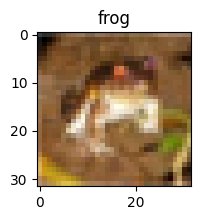

In [ ]:
plot_sample(X_train,y_train,0)

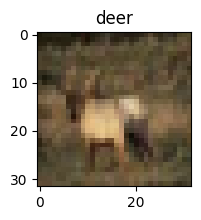

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test/=255

In [ ]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(3000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(10,activation='sigmoid')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)


model.fit(X_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
391/391 [==============================] - 84s 214ms/step - loss: 1.9186 - accuracy: 0.3195
Epoch 2/5
391/391 [==============================] - 100s 257ms/step - loss: 1.7526 - accuracy: 0.3829
Epoch 3/5
391/391 [==============================] - 80s 206ms/step - loss: 1.6832 - accuracy: 0.4131
Epoch 4/5
391/391 [==============================] - 83s 213ms/step - loss: 1.6338 - accuracy: 0.4283
Epoch 5/5
391/391 [==============================] - 78s 201ms/step - loss: 1.5937 - accuracy: 0.4439


In [ ]:
cnn=Sequential([
    #Convultion Neural Network.
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    #Dense
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)


cnn.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8811 - accuracy: 0.3239
Epoch 2/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5341 - accuracy: 0.4572
Epoch 3/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3630 - accuracy: 0.5208
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2629 - accuracy: 0.5564
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1949 - accuracy: 0.5818
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1397 - accuracy: 0.6026
Epoch 7/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0912 - accuracy: 0.6191
Epoch 8/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0469 - accuracy: 0.6371
Epoch 9/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0059 - accuracy: 0.6491
Epoch 10/20
1563/1563 [==============================] - 38s 24m

In [ ]:
test_loss,test_accuracy=cnn.evaluate(X_test,y_test,verbose=2)

313/313 [==============================] - 3s 10ms/step - loss: 1.0448 - accuracy: 0.6517


[1.0447583198547363, 0.6517000198364258]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

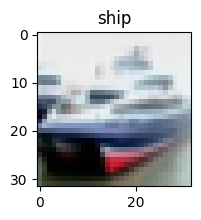

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_predict=cnn.predict(X_test)
y_predict[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.22302115e-04, 6.24695167e-05, 1.92097155e-03, 7.60753393e-01,
        3.82493774e-04, 2.17036426e-01, 5.40150935e-03, 1.18188024e-03,
        1.27014369e-02, 3.36965168e-04],
       [4.00217250e-02, 7.07790017e-01, 2.50124704e-05, 2.88226886e-07,
        2.35351081e-06, 3.84720011e-07, 8.99195953e-08, 1.86742000e-07,
        2.36259282e-01, 1.59006231e-02],
       [6.49993002e-01, 1.40201999e-02, 2.03843252e-03, 7.34767353e-04,
        5.85378497e-04, 1.96692185e-04, 4.58369832e-05, 5.81599830e-04,
        3.08057994e-01, 2.37460695e-02],
       [7.73522854e-01, 2.30897889e-02, 7.56504387e-02, 7.79167400e-04,
        1.47405900e-02, 1.34974252e-04, 1.46229097e-04, 1.59134419e-04,
        1.09533556e-01, 2.24321382e-03],
       [7.18571016e-08, 7.02773423e-06, 1.22710541e-02, 1.95211425e-01,
        6.53021991e-01, 1.28648547e-03, 1.38161525e-01, 1.60803779e-06,
        3.59631122e-05, 2.84449152e-06]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element)for element in y_predict]
y_classes[:5]

[3, 1, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

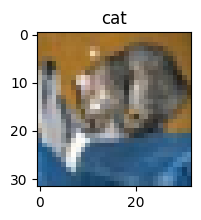

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'